## Loading the data

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt


df_bal = pd.read_csv("../../corpus_sprint2_balanced_cp.csv", encoding="utf-8")
df = df_bal["Consumer complaint narrative"]
df = df.dropna()

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

vectors = model.docvecs.vectors_docs

## Applying K-Medoids

In [2]:
# Set random initial medoids.
initial_medoids = [1, 500]

# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(vectors, initial_medoids)

# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

# Show allocated clusters.
print(clusters)

[[38764, 1, 7, 9, 13, 15, 16, 17, 25, 26, 29, 32, 37, 38, 51, 54, 55, 59, 64, 67, 68, 73, 76, 77, 79, 86, 91, 92, 102, 103, 115, 117, 124, 132, 133, 134, 137, 144, 145, 147, 148, 150, 151, 156, 157, 159, 163, 166, 167, 171, 174, 177, 181, 183, 184, 185, 187, 190, 191, 192, 194, 197, 199, 203, 204, 205, 207, 211, 213, 231, 232, 233, 234, 235, 238, 239, 241, 242, 256, 260, 261, 265, 270, 273, 275, 276, 283, 285, 286, 289, 293, 294, 299, 300, 301, 303, 310, 312, 317, 318, 319, 323, 325, 331, 333, 336, 341, 345, 346, 347, 349, 354, 355, 358, 359, 364, 365, 366, 368, 369, 370, 374, 379, 380, 382, 387, 389, 393, 394, 395, 400, 414, 417, 419, 421, 425, 428, 434, 437, 439, 440, 446, 449, 453, 455, 456, 466, 467, 480, 483, 486, 487, 488, 493, 495, 496, 497, 499, 502, 503, 505, 506, 514, 517, 520, 521, 522, 526, 529, 530, 532, 544, 548, 549, 550, 551, 552, 559, 570, 571, 572, 575, 578, 581, 583, 586, 590, 593, 596, 597, 598, 610, 613, 616, 621, 625, 626, 629, 635, 637, 638, 642, 646, 648, 649, 6

NameError: name 'cluster_visualizer' is not defined

## Visualisation

2


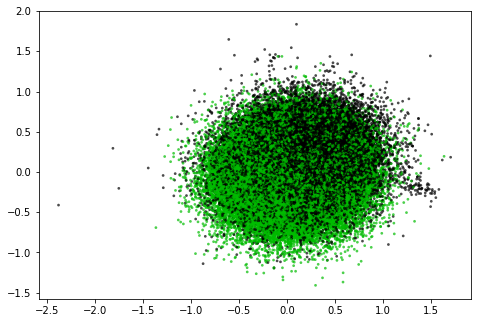

In [26]:
import matplotlib.cm as cm
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])

cluster_labels = kmedoids_instance.predict(vectors)
n_clusters = len(kmedoids_instance.get_clusters())
print(n_clusters)

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax.scatter(vectors[:, 0], vectors[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')